In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('network_backup_dataset.csv')

In [3]:
dataset.head()

,Week #,Day of Week,Backup Start Time - Hour of Day,Work-Flow-ID,File Name,Size of Backup (GB),Backup Time (hour)
0,1,Monday,1,work_flow_0,File_0,0.0,0
1,1,Monday,1,work_flow_2,File_12,0.0,0
2,1,Monday,1,work_flow_2,File_13,0.0,0
3,1,Monday,1,work_flow_2,File_14,0.0,0
4,1,Monday,1,work_flow_2,File_16,0.0,0


In [4]:
df = dataset.replace({'Day of Week': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,
                                  'Saturday': 6, 'Sunday': 7},
                  'Work-Flow-ID': {'work_flow_0': 0, 'work_flow_1': 1, 'work_flow_2': 2, 'work_flow_3': 3,
                                   'work_flow_4': 4},
                  'File Name': {'File_0': 0, 'File_1': 1, 'File_2': 2, 'File_3': 3, 'File_4': 4, 'File_5': 5,
                                'File_6': 6, 'File_7': 7, 'File_8': 8, 'File_9': 9, 'File_10': 10, 'File_11': 11,
                                'File_12': 12, 'File_13': 13, 'File_14': 14, 'File_15': 15, 'File_16': 16,
                                'File_17': 17, 'File_18': 18, 'File_19': 19, 'File_20': 20, 'File_21': 21,
                                'File_22': 22,
                                'File_23': 23, 'File_24': 24, 'File_25': 25, 'File_26': 26, 'File_27': 27,
                                'File_28': 28, 'File_29': 29, }})

In [5]:
df.head()

,Week #,Day of Week,Backup Start Time - Hour of Day,Work-Flow-ID,File Name,Size of Backup (GB),Backup Time (hour)
0,1,1,1,0,0,0.0,0
1,1,1,1,2,12,0.0,0
2,1,1,1,2,13,0.0,0
3,1,1,1,2,14,0.0,0
4,1,1,1,2,16,0.0,0


In [129]:
X = df[
    ['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']].values
y = df['Size of Backup (GB)'].values

### Part i

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print ("Coefficients:", linreg.coef_)
print ("Intercept:", linreg.intercept_)
y_predict = linreg.predict(X_test)
print("RMSE without cross validation:", np.sqrt(mean_squared_error(y_test, y_predict)))

Coefficients: [ -4.46137250e-05  -2.40527826e-03   1.38306408e-03  -4.14520552e-04
   4.85929375e-04]
Intercept: 0.049413880522
RMSE without cross validation: 0.106503866998


In [103]:
def perform_10fold(X,y):
    kf = KFold(n_splits=10,random_state = 0)
    i = 1
    for train_index, test_index in kf.split(X):
        print("Fold : ",i)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regressor = LinearRegression()
        regressor.fit(X_train,y_train)
        train_preds = regressor.predict(X_train)
        test_preds = regressor.predict(X_test)
        print("Training RMSE : ",np.sqrt(mean_squared_error(y_train,train_preds)))
        print("Test RMSE : ",np.sqrt(mean_squared_error(y_test,test_preds)))
        i = i+1

In [104]:
perform_10fold(X,y)

Fold :  1
Training RMSE :  0.103243157575
Test RMSE :  0.106718052072
Fold :  2
Training RMSE :  0.103966777917
Test RMSE :  0.100184614386
Fold :  3
Training RMSE :  0.103225799059
Test RMSE :  0.106849773893
Fold :  4
Training RMSE :  0.103946429196
Test RMSE :  0.100367091678
Fold :  5
Training RMSE :  0.103195112998
Test RMSE :  0.107115854318
Fold :  6
Training RMSE :  0.103938382514
Test RMSE :  0.100445336547
Fold :  7
Training RMSE :  0.103202631623
Test RMSE :  0.10705026882
Fold :  8
Training RMSE :  0.103936385959
Test RMSE :  0.10046664551
Fold :  9
Training RMSE :  0.103200989973
Test RMSE :  0.107074185868
Fold :  10
Training RMSE :  0.103991600589
Test RMSE :  0.0999471208611


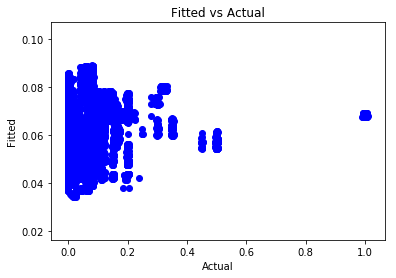

In [130]:
predicted = cross_val_predict(regressor,X , y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted,color='blue')
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Fitted')
plt.title('Fitted vs Actual')
plt.show()

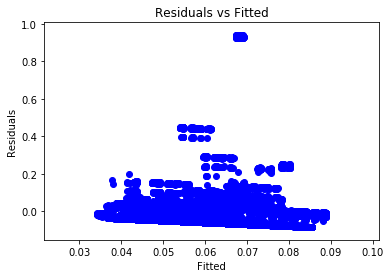

In [131]:
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.scatter(predicted, y - predicted, color='blue', lw=1, label='residual')
#plt.plot([y.min(), y.max()], [0,0], 'k--', lw=4)
plt.show()

### Part ii

In [85]:
scaler = StandardScaler()
df2 = scaler.fit_transform(df)
print(df2[0])

[-1.62003968 -1.51932107 -1.455772   -1.42689367 -1.68739471 -0.58531252
 -0.9891194 ]


In [87]:
X_new = df2[:,0:5]
y_new = df2[:,5]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.1, random_state=0)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print ("Coefficients:", linreg.coef_)
print ("Intercept:", linreg.intercept_)
y_predict = linreg.predict(X_test)
print("RMSE without cross validation:", np.sqrt(mean_squared_error(y_test, y_predict)))

Coefficients: [-0.00184992 -0.04606465  0.09071622 -0.00563138  0.04040322]
Intercept: -0.0020642502433
RMSE without cross validation: 1.02221148954


In [96]:
perform_10fold(X_new,y_new)

Fold :  1
Training RMSE :  0.990915587057
Test RMSE :  1.02426721249
Fold :  2
Training RMSE :  0.997860809307
Test RMSE :  0.961560052115
Fold :  3
Training RMSE :  0.990748982073
Test RMSE :  1.02553146292
Fold :  4
Training RMSE :  0.997665504703
Test RMSE :  0.963311447526
Fold :  5
Training RMSE :  0.990454460899
Test RMSE :  1.02808527129
Fold :  6
Training RMSE :  0.997588273599
Test RMSE :  0.964062432504
Fold :  7
Training RMSE :  0.990526623774
Test RMSE :  1.02745578946
Fold :  8
Training RMSE :  0.997569110901
Test RMSE :  0.964266953403
Fold :  9
Training RMSE :  0.990510867406
Test RMSE :  1.02768534245
Fold :  10
Training RMSE :  0.998099054371
Test RMSE :  0.959280617415


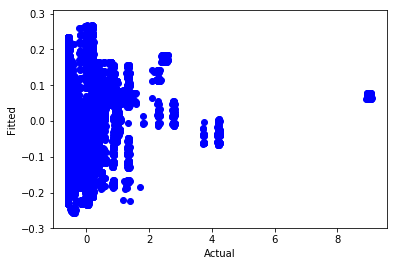

In [128]:
predicted = cross_val_predict(regressor,X_new, y_new, cv=10)
fig, ax = plt.subplots()
ax.scatter(y_new, predicted,color='blue')
#ax.plot([y_new.min(), y_new.max()], [y_new.min(), y_new.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Fitted')
plt.show()

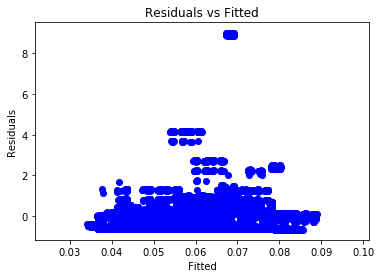

In [132]:
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.scatter(predicted, y_new - predicted, color='blue', lw=1, label='residual')
#plt.plot([y_new.min(), y_new.max()], [0,0], 'k--', lw=4)
plt.show()

### Part iii

In [108]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression

In [119]:
X = df[
    ['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']].values
y = df['Size of Backup (GB)'].values

In [125]:
selectbest = SelectKBest(f_regression,k=3)
X_f = selectbest.fit_transform(X, y)
selectbest.scores_

array([  8.45006257e-03,   3.88163798e+01,   1.50740934e+02,
         2.61386654e+01,   2.53200943e+01])

#### Best features from f_regression = Day of the week, Backup time - hour of day, workflow id

In [126]:
selectbest2 = SelectKBest(mutual_info_regression,k=3)
X_mi = selectbest2.fit_transform(X, y)
selectbest2.scores_

C:\Users\shivu.soman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


array([ 0.        ,  0.22695139,  0.23181192,  0.27606812,  0.42974892])

#### Best features from mutual_info_regression = Backup time - hour of day, workflow id, file name

In [133]:
perform_10fold(X_f,y)

Fold :  1
Training RMSE :  0.103243693315
Test RMSE :  0.106703921572
Fold :  2
Training RMSE :  0.103967592085
Test RMSE :  0.10017006517
Fold :  3
Training RMSE :  0.103225856311
Test RMSE :  0.106848983926
Fold :  4
Training RMSE :  0.103946646253
Test RMSE :  0.100364814404
Fold :  5
Training RMSE :  0.103195198107
Test RMSE :  0.107115636526
Fold :  6
Training RMSE :  0.103938426941
Test RMSE :  0.100445512392
Fold :  7
Training RMSE :  0.103202884586
Test RMSE :  0.107047633732
Fold :  8
Training RMSE :  0.103936467419
Test RMSE :  0.100464690829
Fold :  9
Training RMSE :  0.103201641248
Test RMSE :  0.107064190055
Fold :  10
Training RMSE :  0.103991747011
Test RMSE :  0.0999416817071


In [134]:
perform_10fold(X_mi,y)

Fold :  1
Training RMSE :  0.103344438318
Test RMSE :  0.10687608756
Fold :  2
Training RMSE :  0.104085466786
Test RMSE :  0.100186646413
Fold :  3
Training RMSE :  0.103325621354
Test RMSE :  0.107030075687
Fold :  4
Training RMSE :  0.104063726743
Test RMSE :  0.100390291344
Fold :  5
Training RMSE :  0.103294452926
Test RMSE :  0.107301128015
Fold :  6
Training RMSE :  0.104056690265
Test RMSE :  0.100458245785
Fold :  7
Training RMSE :  0.103304044324
Test RMSE :  0.107216917862
Fold :  8
Training RMSE :  0.104054198375
Test RMSE :  0.100482659732
Fold :  9
Training RMSE :  0.1033002603
Test RMSE :  0.10725446069
Fold :  10
Training RMSE :  0.104109398463
Test RMSE :  0.09996116867


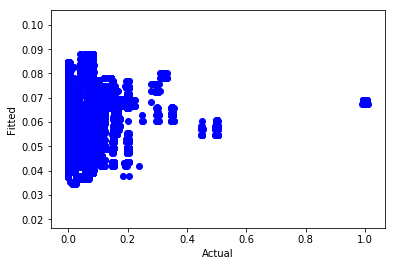

In [137]:
predicted = cross_val_predict(regressor,X_f, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted,color='blue')
#ax.plot([y_new.min(), y_new.max()], [y_new.min(), y_new.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Fitted')
plt.show()

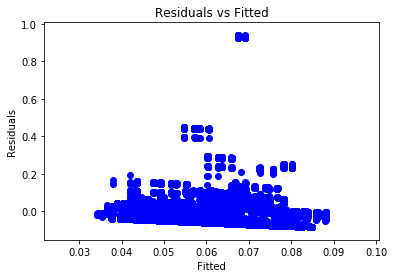

In [138]:
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.scatter(predicted, y - predicted, color='blue', lw=1, label='residual')
#plt.plot([y_new.min(), y_new.max()], [0,0], 'k--', lw=4)
plt.show()

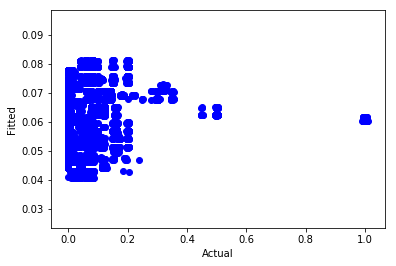

In [139]:
predicted = cross_val_predict(regressor,X_mi, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted,color='blue')
#ax.plot([y_new.min(), y_new.max()], [y_new.min(), y_new.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Fitted')
plt.show()

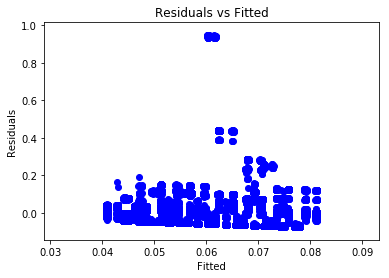

In [140]:
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.scatter(predicted, y - predicted, color='blue', lw=1, label='residual')
#plt.plot([y_new.min(), y_new.max()], [0,0], 'k--', lw=4)
plt.show()